# 0 Load dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!nvidia-smi

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Wed Nov 23 07:22:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    13W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+------

In [2]:
PROJECT_path = '/content/drive/MyDrive/IDB_diamond_damage'

In [3]:
import os
import numpy as np
from tqdm import tqdm
from PIL import Image

## 0.1 [A] 65-class classification

In [4]:
def load_dataset(dataset_path):
  image_list = []
  label_list = []
  class_list = []
  image_num = 0
  tag = 0
  n = 0
  category_names = os.listdir(dataset_path)
  category_num = len(category_names)
  category_names.sort()
  for category in category_names:
    n += 1
    if n<10:
      class_n = "(0"+str(n)+")"
    else:
      class_n = "("+str(n)+")"
    class_list.append(class_n)
    category_path = os.path.join(dataset_path, category)
    file_names = os.listdir(category_path)
    file_nums = len(file_names)
    file_names.sort()
    print("class No. "+class_n+"; category: "+str(category)+"; image num: ", file_nums, end=" ")
    image_num += file_nums
    for file in tqdm(file_names):
      file_path = os.path.join(category_path, file)
      image = Image.open(file_path)
      img = np.asarray(image,dtype="float32")

      #chose wheather to crop the images, e.g., 1024*1024
      img = img[0:1024, 0:1024]
      
      img = img[:, :, np.newaxis] 
      image_list.append(img)
      label_list.append(tag)
    tag += 1
  return image_list, label_list, category_num, class_list, image_num

## 0.1 [B] 3-class classification

In [5]:
# def load_dataset(dataset_path):
#   image_list = []
#   label_list = []
#   class_list = ["original group", "heating group", "sintering group"]
#   image_num = 0
#   n = 0
#   category_names = os.listdir(dataset_path)
#   category_num = len(category_names)
#   category_names.sort()
#   for category in category_names:
#     n += 1
#     if n<16:
#       class_n = "original group"
#       tag = 0
#     else:
#       if n<31:
#         class_n = "heating group"
#         tag = 1
#       else:
#         class_n = "sintering group"
#         tag = 2
#     category_path = os.path.join(dataset_path, category)
#     file_names = os.listdir(category_path)
#     file_nums = len(file_names)
#     file_names.sort()
#     print("class "+str(tag)+" "+class_n+"; category: "+str(category)+"; image num: ", file_nums, end=" ")
#     image_num += file_nums
#     for file in tqdm(file_names):
#       file_path = os.path.join(category_path, file)
#       image = Image.open(file_path)
#       img = np.asarray(image,dtype="float32")

#       #chose wheather to crop the images, e.g., 1024*1024
#       img = img[0:1024, 0:1024]
      
#       img = img[:, :, np.newaxis] 
#       image_list.append(img)
#       label_list.append(tag)
#   return image_list, label_list, len(class_list), class_list, image_num

## 0.2 Dataset processing

In [6]:
X_set, Y_set, CLASS_num, CLASS_list, IMG_num = load_dataset(os.path.join(PROJECT_path, 'SEM'))
print("\n")
print("Damage class num = ", CLASS_num)
print("Damage class list: ", CLASS_list)
print("SEM image num = ", IMG_num)

class No. (01); category: 01_25.30_2280_original; image num:  43 

100%|██████████| 43/43 [00:00<00:00, 98.13it/s] 


class No. (02); category: 02_30.35_2280_original; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 172.84it/s]


class No. (03); category: 03_35.40_2280_original; image num:  45 

100%|██████████| 45/45 [00:00<00:00, 187.82it/s]


class No. (04); category: 04_40.45_2180_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 192.61it/s]


class No. (05); category: 05_45.50_2190_original; image num:  43 

100%|██████████| 43/43 [00:00<00:00, 188.20it/s]


class No. (06); category: 06_25.30_2280+Ti_original; image num:  43 

100%|██████████| 43/43 [00:00<00:00, 193.97it/s]


class No. (07); category: 07_30.35_2280+Ti_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 187.34it/s]


class No. (08); category: 08_35.40_2280+Ti_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 196.16it/s]


class No. (09); category: 09_40.45_2180+Ti_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 183.68it/s]


class No. (10); category: 10_45.50_2180+Ti_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 190.66it/s]


class No. (11); category: 11_40.50_ISD1750_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 172.66it/s]


class No. (12); category: 12_40.50_JS1100_original; image num:  48 

100%|██████████| 48/48 [00:00<00:00, 117.41it/s]


class No. (13); category: 13_50.60_JS1100_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 112.91it/s]


class No. (14); category: 14_60.70_JS1100_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 119.20it/s]


class No. (15); category: 15_70.80_JS1100_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 116.43it/s]


class No. (16); category: 16_25.30_2280_heating; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 118.51it/s]


class No. (17); category: 17_30.35_2280_heating; image num:  44 

100%|██████████| 44/44 [00:00<00:00, 116.99it/s]


class No. (18); category: 18_35.40_2280_heating; image num:  43 

100%|██████████| 43/43 [00:00<00:00, 116.82it/s]


class No. (19); category: 19_40.45_2180_heating; image num:  41 

100%|██████████| 41/41 [00:00<00:00, 115.20it/s]


class No. (20); category: 20_45.50_2190_heating; image num:  44 

100%|██████████| 44/44 [00:00<00:00, 94.13it/s]


class No. (21); category: 21_25.30_2280+Ti_heating; image num:  41 

100%|██████████| 41/41 [00:00<00:00, 101.89it/s]


class No. (22); category: 22_30.35_2280+Ti_heating; image num:  48 

100%|██████████| 48/48 [00:00<00:00, 93.11it/s]


class No. (23); category: 23_35.40_2280+Ti_heating; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 88.76it/s]


class No. (24); category: 24_40.45_2180+Ti_heating; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 91.76it/s]


class No. (25); category: 25_45.50_2180+Ti_heating; image num:  43 

100%|██████████| 43/43 [00:00<00:00, 95.31it/s] 


class No. (26); category: 26_40.50_ISD1750_heating; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 97.25it/s]


class No. (27); category: 27_40.50_JS1100_heating; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 89.34it/s]


class No. (28); category: 28_50.60_JS1100_heating; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 98.57it/s] 


class No. (29); category: 29_60.70_JS1100_heating; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 99.58it/s] 


class No. (30); category: 30_70.80_JS1100_heating; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 92.35it/s]


class No. (31); category: 31_25.30_2280_sintering; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 91.99it/s]


class No. (32); category: 32_30.35_2280_sintering; image num:  44 

100%|██████████| 44/44 [00:00<00:00, 106.38it/s]


class No. (33); category: 33_35.40_2280_sintering; image num:  41 

100%|██████████| 41/41 [00:00<00:00, 103.96it/s]


class No. (34); category: 34_40.45_2180_sintering; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 102.55it/s]


class No. (35); category: 35_40.45_2190_sintering; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 100.78it/s]


class No. (36); category: 36_50.60_JS1100_20200701T.1; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 104.86it/s]


class No. (37); category: 37_50.60_JS1100_20200701T.2; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 126.57it/s]


class No. (38); category: 38_50.60_JS1100_20200701T.3; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 120.39it/s]


class No. (39); category: 39_50.60_JS1100_20200710T1.1; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 90.83it/s]


class No. (40); category: 40_50.60_JS1100_20200710T1.2; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 147.77it/s]


class No. (41); category: 41_50.60_JS1100_20200710T1.3; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 132.78it/s]


class No. (42); category: 42_50.60_JS1100_20200710T2.1; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 128.09it/s]


class No. (43); category: 43_50.60_JS1100_20200710T2.2; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 105.35it/s]


class No. (44); category: 44_50.60_JS1100_20200710T2.3; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 133.43it/s]


class No. (45); category: 45_50.60_JS1100_20200713T0.1; image num:  88 

100%|██████████| 88/88 [00:00<00:00, 170.01it/s]


class No. (46); category: 46_50.60_JS1100_20200713T0.2; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 180.71it/s]


class No. (47); category: 47_50.60_JS1100_20200713T0.3; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 195.35it/s]


class No. (48); category: 48_50.60_JS1100_20200713T1.1; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 186.19it/s]


class No. (49); category: 49_50.60_JS1100_20200713T1.2; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 191.01it/s]


class No. (50); category: 50_50.60_JS1100_20200713T1.3; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 182.38it/s]


class No. (51); category: 51_50.60_JS1100_20200713T2.1; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 183.60it/s]


class No. (52); category: 52_50.60_JS1100_20200713T2.2; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 180.94it/s]


class No. (53); category: 53_50.60_JS1100_20200713T2.3; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 192.55it/s]


class No. (54); category: 54_50.60_JS1100_20200713T3.1; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 126.04it/s]


class No. (55); category: 55_50.60_JS1100_20200713T3.2; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 113.14it/s]


class No. (56); category: 56_50.60_JS1100_20200713T3.3; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 116.71it/s]


class No. (57); category: 57_50.60_JS1100_20200714T1.1; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 119.26it/s]


class No. (58); category: 58_50.60_JS1100_20200714T1.2; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 115.32it/s]


class No. (59); category: 59_50.60_JS1100_20200714T1.3; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 119.25it/s]


class No. (60); category: 60_50.60_JS1100_20200714T2.1; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 112.52it/s]


class No. (61); category: 61_50.60_JS1100_20200714T2.2; image num:  47 

100%|██████████| 47/47 [00:00<00:00, 107.03it/s]


class No. (62); category: 62_50.60_JS1100_20200714T2.3; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 115.05it/s]


class No. (63); category: 63_50.60_JS1100_20200714T3.1; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 162.26it/s]


class No. (64); category: 64_50.60_JS1100_20200714T3.2; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 183.38it/s]


class No. (65); category: 65_50.60_JS1100_20200714T3.3; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 193.75it/s]



Damage class num =  65
Damage class list:  ['(01)', '(02)', '(03)', '(04)', '(05)', '(06)', '(07)', '(08)', '(09)', '(10)', '(11)', '(12)', '(13)', '(14)', '(15)', '(16)', '(17)', '(18)', '(19)', '(20)', '(21)', '(22)', '(23)', '(24)', '(25)', '(26)', '(27)', '(28)', '(29)', '(30)', '(31)', '(32)', '(33)', '(34)', '(35)', '(36)', '(37)', '(38)', '(39)', '(40)', '(41)', '(42)', '(43)', '(44)', '(45)', '(46)', '(47)', '(48)', '(49)', '(50)', '(51)', '(52)', '(53)', '(54)', '(55)', '(56)', '(57)', '(58)', '(59)', '(60)', '(61)', '(62)', '(63)', '(64)', '(65)']
SEM image num =  2870


In [7]:
save_dir = os.path.join(PROJECT_path, 'saved_models')
if not os.path.isdir(save_dir):
  os.makedirs(save_dir)

# 1 Dataset processing

In [8]:
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [9]:
def classification_dataset_process(X_set, Y_set):
  
  # choose the size to convert, e.g., 224*224
  X_set = [cv2.cvtColor(cv2.resize(i, (224, 224)), cv2.COLOR_GRAY2RGB) for i in X_set]

  X_set = np.asarray(X_set)
  X_set = X_set.astype('float32')
  X_set /= 255.0
  Y_set = tf.keras.utils.to_categorical(Y_set, CLASS_num)
  return X_set, Y_set

In [10]:
X_set, Y_set = classification_dataset_process(X_set, Y_set)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_set,Y_set,test_size = 0.25, random_state = 888)

In [12]:
print(X_train.shape)
print(Y_train)
print(X_test.shape)
print(Y_test)

(2152, 224, 224, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(718, 224, 224, 3)
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# 2 VGG16 classification model

## 2.1 [A] model establishment - DIY

In [13]:
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
# from keras.models import Sequential, Model

In [14]:
# model = Sequential()

# # Block_1
# model.add(Conv2D(64, (3, 3), padding = 'same', activation='relu', input_shape=X_train.shape[1:]))
# model.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Block_2
# model.add(Conv2D(128, (3, 3), padding = 'same', activation='relu'))
# model.add(Conv2D(128, (3, 3), padding = 'same', activation='relu'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Block_3
# model.add(Conv2D(256, (3, 3), padding = 'same', activation='relu'))
# model.add(Conv2D(256, (3, 3), padding = 'same', activation='relu'))
# model.add(Conv2D(256, (3, 3), padding = 'same', activation='relu'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Block_4
# model.add(Conv2D(512, (3, 3), padding = 'same', activation='relu'))
# model.add(Conv2D(512, (3, 3), padding = 'same', activation='relu'))
# model.add(Conv2D(512, (3, 3), padding = 'same', activation='relu'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Block_5
# model.add(Conv2D(512, (3, 3), padding = 'same', activation='relu'))
# model.add(Conv2D(512, (3, 3), padding = 'same', activation='relu'))
# model.add(Conv2D(512, (3, 3), padding = 'same', activation='relu'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Block_6
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(CLASS_num, activation='softmax'))

## 2.1 [B] Model establishment - Import (Transfer Learning)

In [15]:
from keras import applications
from keras.layers import Flatten, Dense, Dropout, Activation
from keras.models import Sequential, Model

In [16]:
base_model = applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=X_train.shape[1:])
print(base_model.output)
model = Sequential()
model.add(Flatten(input_shape=base_model.output_shape[1:]))

# add the rest layers
model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(CLASS_num, activation='softmax'))
model=Model(inputs=base_model.input, outputs=model(base_model.output))

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 512), dtype=tf.float32, name=None), name='block5_pool/MaxPool:0', description="created by layer 'block5_pool'")


In [17]:
# whether or not apply Fine-tunning
fine_tuning = True
if fine_tuning:
  for layer in base_model.layers:
    layer.trainable = False

## 2.2 Model compiling

In [18]:
from keras.models import Model

In [19]:
# choose approriate optimizer, loss function
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

## 2.3 Model training



In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

In [21]:
# set hyper-parameters
epochs = 100
batch_size = 10

# whether or not apply early stopping
early_stopping = False
if early_stopping:
  callbacks = [EarlyStopping(monitor='val_loss', patience=3)]
else:
  callbacks = None

# whether or not apply data augmentation 
data_augmentation = True

In [22]:
if not data_augmentation:
  print('Not using data augmentation.')
  history = model.fit(X_train, Y_train, 
             batch_size=batch_size, 
             epochs=epochs, 
             validation_data=(X_test, Y_test), 
             shuffle=True, 
             callbacks=callbacks)
else:
  print('Using real-time data augmentation.')
  datagen = ImageDataGenerator(featurewise_center=False, 
                               samplewise_center=False,  
                               featurewise_std_normalization=False,  
                               samplewise_std_normalization=False, 
                               zca_whitening=False, 
                               zca_epsilon=1e-06, 
                               rotation_range=180, 
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0., 
                               zoom_range=[0.8,1.2],
                               channel_shift_range=0., 
                               fill_mode='nearest',
                               cval=0., 
                               horizontal_flip=True, 
                               vertical_flip=True, 
                               rescale=None,
                               preprocessing_function=None,
                               data_format=None,
                               validation_split=0.0)
  datagen.fit(X_train)
  history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),  
                                epochs=epochs, 
                                steps_per_epoch=X_train.shape[0]//batch_size, 
                                validation_data=(X_test, Y_test), 
                                workers=10,
                                callbacks=callbacks)

Using real-time data augmentation.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
215/215 [==============================] - 31s 109ms/step - loss: 3.9212 - accuracy: 0.0476 - val_loss: 3.6370 - val_accuracy: 0.0780
Epoch 2/100
215/215 [==============================] - 19s 86ms/step - loss: 3.4835 - accuracy: 0.0798 - val_loss: 3.4738 - val_accuracy: 0.0850
Epoch 3/100
215/215 [==============================] - 19s 85ms/step - loss: 3.2813 - accuracy: 0.1008 - val_loss: 3.2566 - val_accuracy: 0.0961
Epoch 4/100
215/215 [==============================] - 19s 84ms/step - loss: 3.1638 - accuracy: 0.1190 - val_loss: 3.2108 - val_accuracy: 0.1045
Epoch 5/100
215/215 [==============================] - 18s 84ms/step - loss: 3.0390 - accuracy: 0.1326 - val_loss: 3.0985 - val_accuracy: 0.1323
Epoch 6/100
215/215 [==============================] - 19s 84ms/step - loss: 2.9609 - accuracy: 0.1550 - val_loss: 3.0384 - val_accuracy: 0.1462
Epoch 7/100
215/215 [==============================] - 19s 84ms/step - loss: 2.9276 - accuracy: 0.1475 - val_loss: 2.9354 - val_a

## 2.4 Model preservation

In [23]:
import os
from keras.models import Model

In [24]:
model_path = os.path.join(save_dir, "classification_model.h5")
model.save(model_path)
print('Classification model saved at %s ' % model_path)

Classification model saved at /content/drive/MyDrive/IDB_diamond_damage/saved_models/classification_model.h5 


In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## 2.5 Training curves

In [26]:
import os
import matplotlib.pyplot as plt

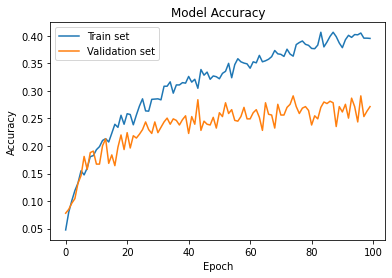

In [27]:
# Plot Accuracy-Epoch_default
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train set', 'Validation set'], loc='upper left')
plt.savefig(os.path.join(save_dir, 'model_accuracy_default.png'))
plt.show()

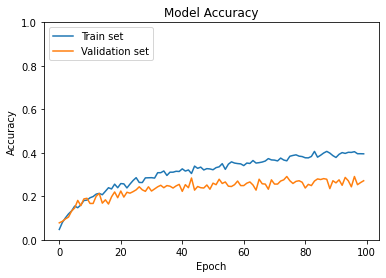

In [28]:
# Plot Accuracy-Epoch 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train set', 'Validation set'], loc='upper left')
plt.ylim(0,1)
plt.savefig(os.path.join(save_dir, 'model_accuracy.png'))
plt.show()

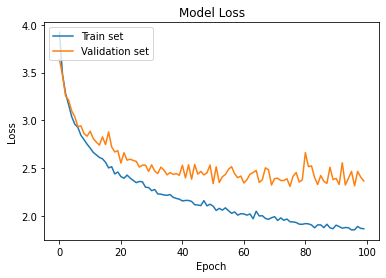

In [29]:
# Plot Loss-Epoch_default
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train set', 'Validation set'], loc='upper left')
plt.savefig(os.path.join(save_dir, 'model_loss_default.png'))
plt.show()

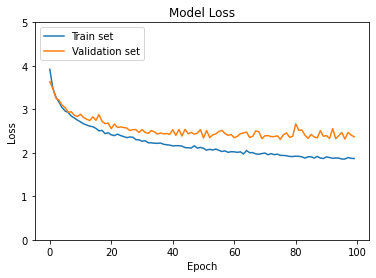

In [30]:
# Plot Loss-Epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train set', 'Validation set'], loc='upper left')
plt.ylim(0,5)
plt.savefig(os.path.join(save_dir, 'model_loss.png'))
plt.show()

## 2.6 Model prediction

In [31]:
from keras.models import Model

In [32]:
Y_test_pred=model.predict(X_test)
print(Y_test_pred)

23/23 [==============================] - 4s 152ms/step
[[2.65579030e-12 4.43566435e-13 7.11848183e-16 ... 1.02841979e-04
  6.87018111e-02 2.31718540e-01]
 [1.67279315e-10 2.79863372e-11 8.76667402e-12 ... 9.85942595e-03
  8.39722808e-03 2.85250600e-02]
 [7.81109968e-11 5.16754554e-13 5.45923587e-16 ... 3.38884347e-05
  1.34819141e-02 2.76154354e-02]
 ...
 [9.32051677e-14 7.28068480e-05 1.09681580e-03 ... 1.14368411e-18
  3.78053729e-30 7.92918018e-32]
 [7.71100866e-04 3.52465169e-04 5.19274654e-05 ... 1.33019573e-09
  8.13392062e-12 6.14476663e-14]
 [1.00962814e-11 5.07941887e-13 1.27427831e-14 ... 5.66283183e-04
  2.43378207e-02 5.19823693e-02]]


## 2.7 Confusion matrix

In [33]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

### 2.7.1 Prediction results on test set

In [34]:
Y_test_true_label = []
for i in range(len(Y_test)):
  n = np.argmax(Y_test[i])
  Y_test_true_label.append(n)

Y_test_pred_label = []
for i in range(len(Y_test_pred)):
  n = np.argmax(Y_test_pred[i])
  Y_test_pred_label.append(n)

In [35]:
print(Y_test_true_label)
print(Y_test)
print(Y_test_pred_label)
print(Y_test_pred)

[64, 42, 40, 9, 25, 21, 10, 27, 64, 14, 50, 31, 1, 61, 44, 12, 8, 45, 14, 11, 8, 27, 39, 21, 38, 4, 57, 22, 61, 61, 10, 52, 25, 15, 0, 50, 44, 10, 42, 42, 34, 62, 45, 60, 52, 45, 15, 41, 54, 61, 5, 34, 29, 3, 52, 30, 38, 44, 2, 61, 36, 54, 26, 63, 45, 5, 12, 44, 56, 44, 47, 38, 5, 63, 8, 52, 53, 16, 55, 7, 42, 9, 25, 41, 44, 33, 50, 16, 30, 55, 44, 44, 0, 30, 20, 40, 27, 49, 53, 64, 52, 60, 19, 9, 48, 22, 15, 36, 36, 58, 23, 44, 3, 7, 36, 35, 51, 48, 51, 46, 17, 2, 38, 46, 54, 8, 3, 46, 16, 53, 18, 6, 27, 35, 26, 10, 43, 9, 3, 4, 29, 39, 51, 2, 48, 61, 61, 3, 34, 25, 7, 15, 39, 47, 4, 19, 47, 7, 53, 19, 12, 59, 40, 59, 62, 28, 29, 14, 6, 43, 60, 52, 52, 0, 50, 52, 33, 22, 37, 0, 34, 44, 63, 40, 40, 46, 26, 50, 30, 58, 25, 27, 26, 3, 45, 37, 41, 52, 14, 64, 22, 17, 49, 32, 30, 37, 16, 40, 27, 40, 28, 9, 0, 32, 50, 55, 48, 7, 48, 25, 44, 31, 20, 19, 11, 34, 26, 60, 22, 4, 16, 31, 32, 44, 60, 3, 17, 34, 42, 22, 48, 10, 55, 48, 5, 49, 26, 57, 26, 48, 16, 29, 58, 35, 57, 20, 4, 4, 57, 44, 3

### 2.7.2 [A] Confusion matrix

In [36]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Greens, normalize=True):    
  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy
  if cmap is None:
    cmap = plt.get_cmap('Blues')
  plt.figure(figsize=(30, 30))   # (15,12)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.savefig(os.path.join(save_dir, "confusion_matrixA.png"), dpi=350)
  plt.show()

In [37]:
 def plot_conf(y_pre, y_val, labels):
  conf_mat = confusion_matrix(y_true=y_val, y_pred=y_pre)
  print(conf_mat)
  plot_confusion_matrix(conf_mat, normalize=False, target_names=labels, title='Confusion Matrix')

[[8 0 0 ... 0 0 0]
 [0 1 2 ... 0 0 0]
 [0 0 8 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 3]]


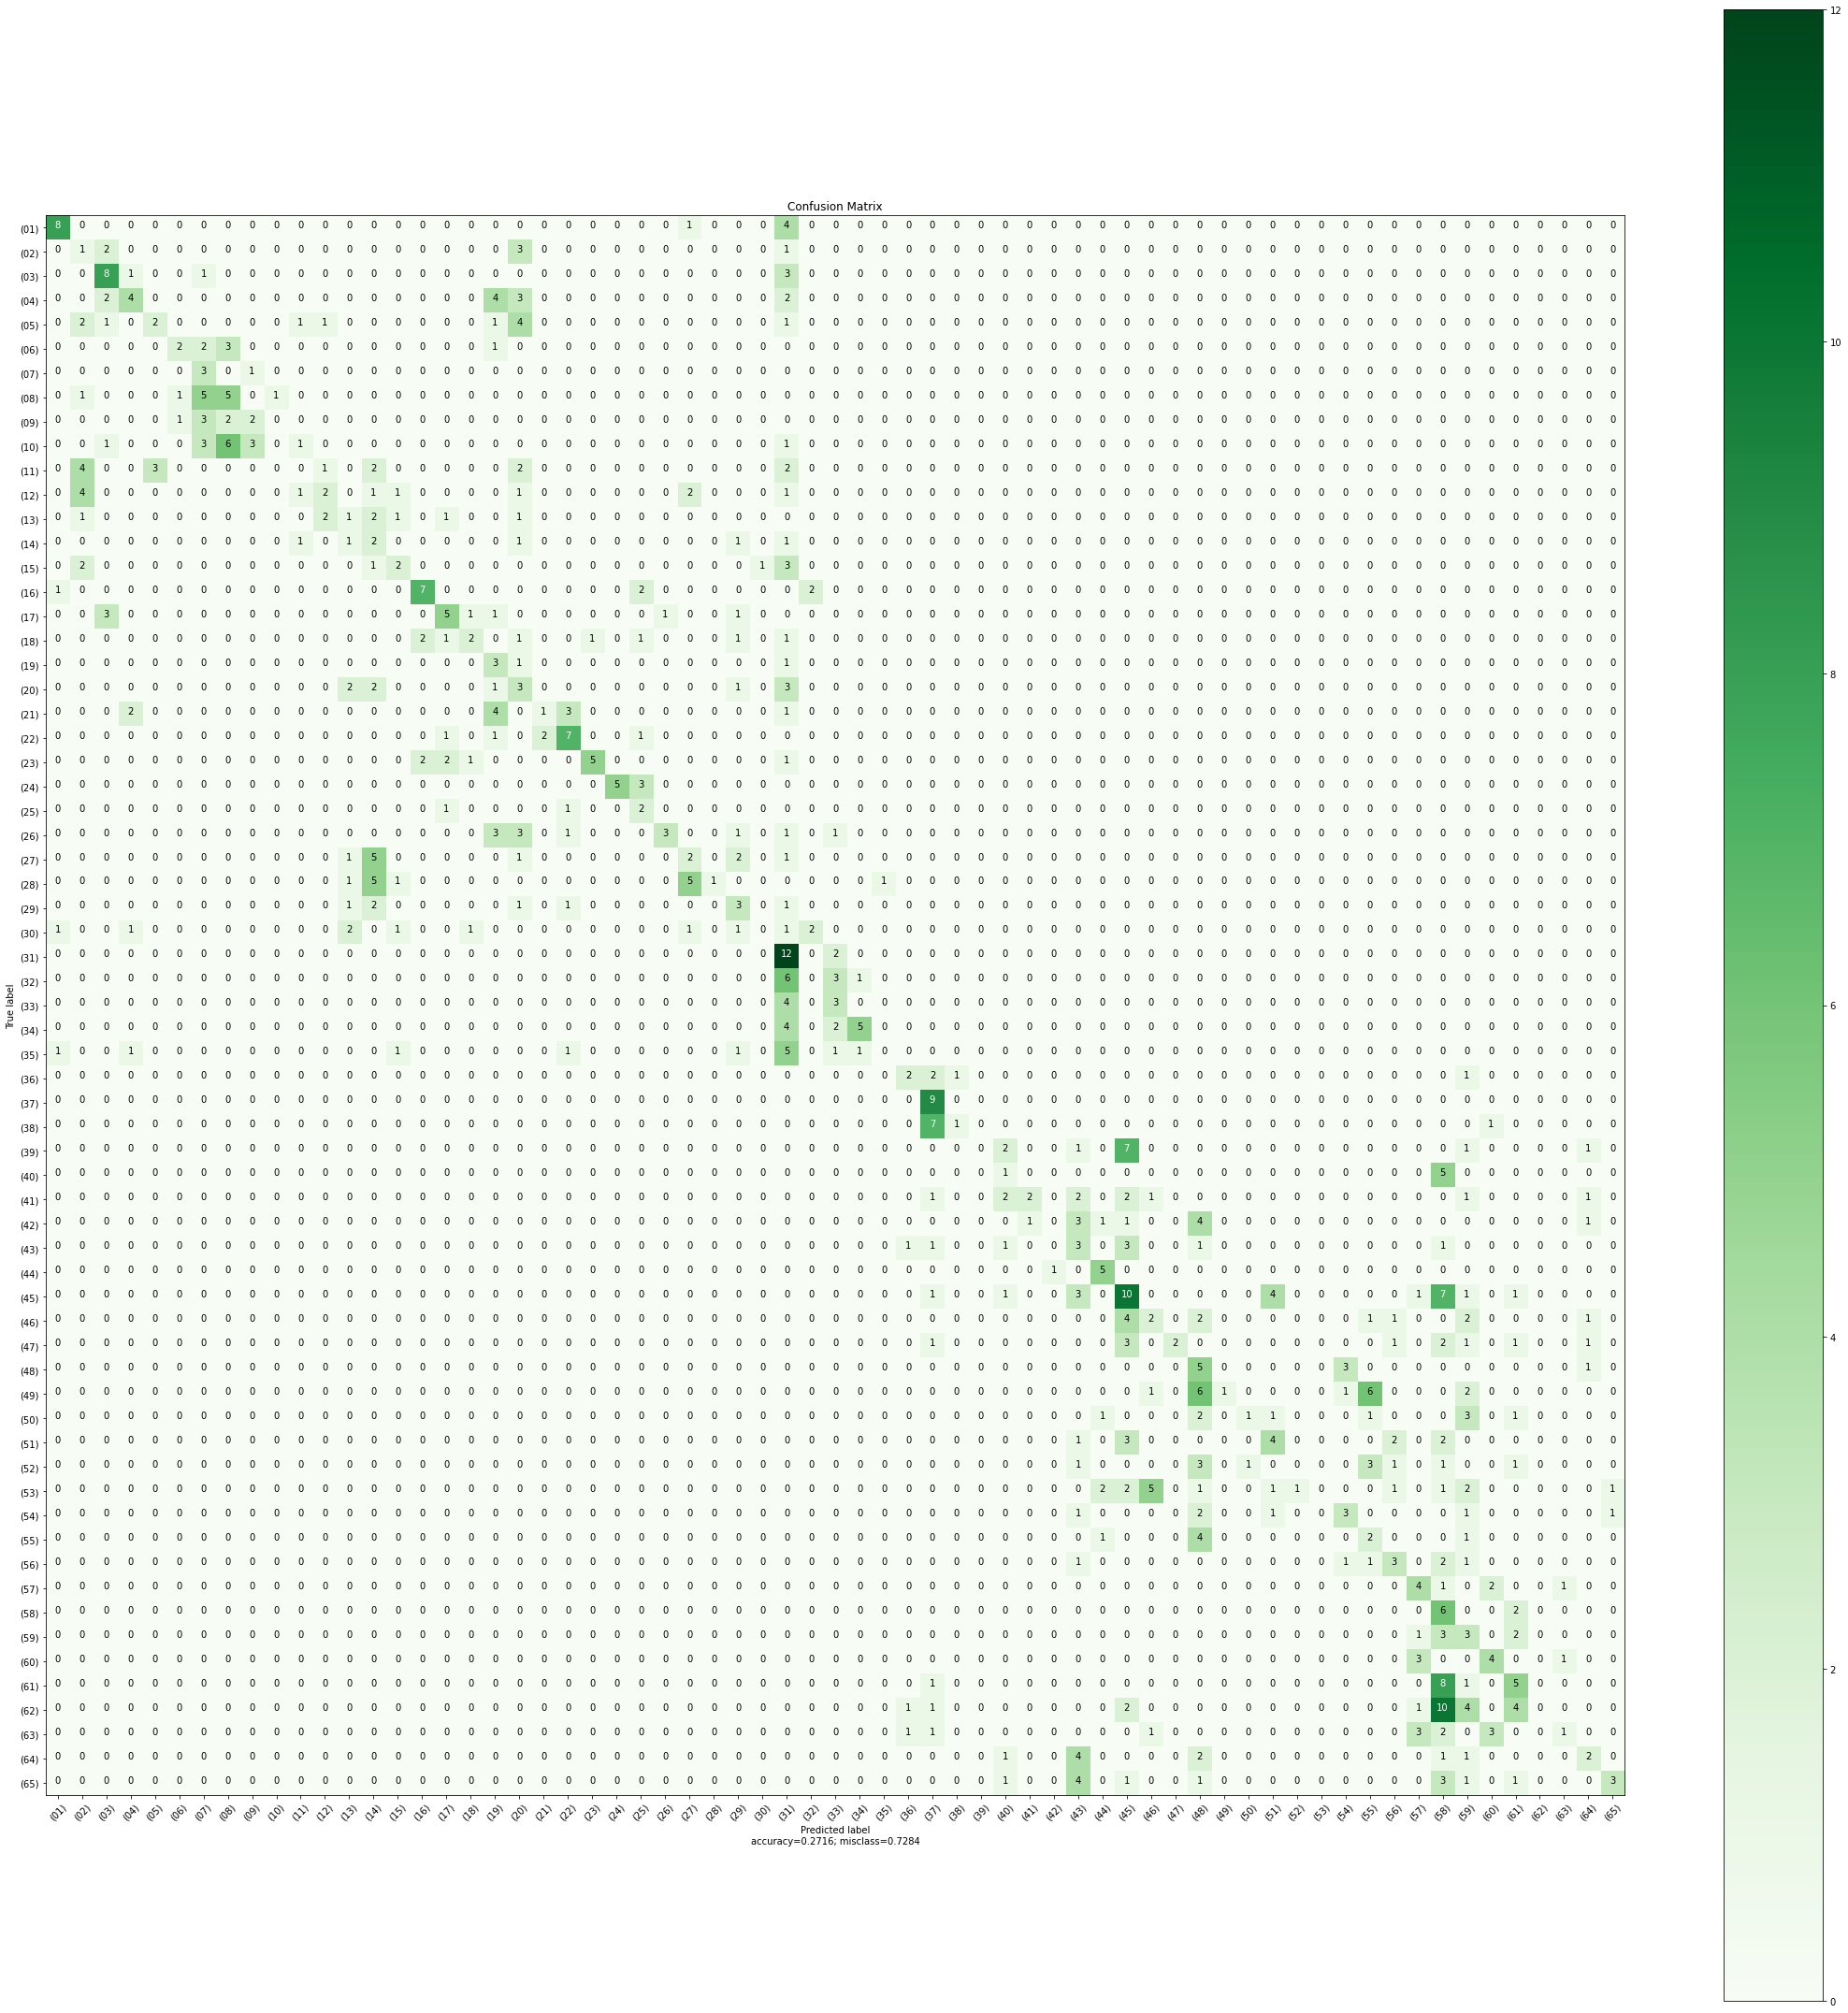

In [38]:
C = confusion_matrix(Y_test_true_label, Y_test_pred_label)
plot_conf(Y_test_pred_label, Y_test_true_label, CLASS_list)

### 2.7.2 [B] Confusion matrix

In [39]:
# def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.jet):
#   cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  
#   if cmap is None:
#     cmap = plt.get_cmap('Blues')
#   plt.figure(figsize=(15, 12))   # (15,12)   
#   plt.imshow(cm, interpolation='nearest', cmap=cmap)
#   plt.title(title)
#   plt.colorbar()
#   tick_marks = np.arange(len(classes))
#   plt.xticks(tick_marks, classes, rotation=45)
#   plt.yticks(tick_marks, classes)
#   thresh = cm.max() / 2.
#   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#     plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
#   plt.tight_layout()
#   plt.ylabel('True label')
#   plt.xlabel('Predicted label')
#   plt.savefig(os.path.join(save_dir, "confusion_matrixB.png"), dpi=350)
#   plt.show()

In [40]:
# def plot_confuse(model, x_val, y_val):
#   # predictions = model.predict_classes(x_val)
#   predictions = np.argmax(model.predict(x_val),axis=1)
#   truelabel = y_val.argmax(axis=-1) 
#   conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
#   plt.figure()
#   plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1))

In [41]:
# print(X_test.shape)
# print(Y_test.shape)
# plot_confuse(model, X_test, Y_test)

## 2.8 Feature maps

In [42]:
import os
import keras
import numpy as np

In [43]:
visual_folder = os.path.join(save_dir, "classification_model_visual")
visual_plot_folder = os.path.join(save_dir, "classification_model_visual_plot")

if not os.path.isdir(visual_folder):
  os.makedirs(visual_folder)

if not os.path.isdir(visual_plot_folder):
  os.makedirs(visual_plot_folder)

In [44]:
def visual(model, data, num_layer):
  data = np.expand_dims(data, axis=0) 
  layer = keras.backend.function([model.layers[0].input], [model.layers[num_layer].output])
  f1 = layer([data])[0]
  num = f1.shape[-1]
  plt.figure(figsize=(8, 8))
  print("saving images in layer_"+str(num_layer)+" ...")
  for i in range(num):
    plt.subplot(np.ceil(np.sqrt(num)), np.ceil(np.sqrt(num)), i+1)
    layer_img = f1[0, :, :, i] * 255
    plt.imshow(layer_img, cmap='gray')
    plt.axis('off')
    visual_single_name = "layer_"+str(num_layer)+"_img_"+str(i)+".png"
    layer_single_path = os.path.join(visual_folder, visual_single_name)
    cv2.imwrite(layer_single_path, layer_img)
  layer_all_name = "layer_"+str(num_layer)+".png"
  layer_all_path = os.path.join(visual_plot_folder, layer_all_name)
  plt.savefig(layer_all_path, dpi=350)
  plt.show()

saving images in layer_0 ...


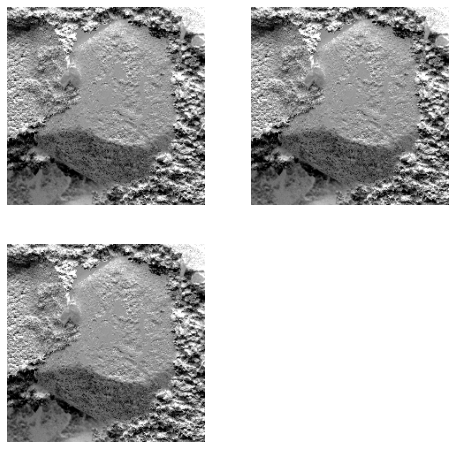

saving images in layer_1 ...


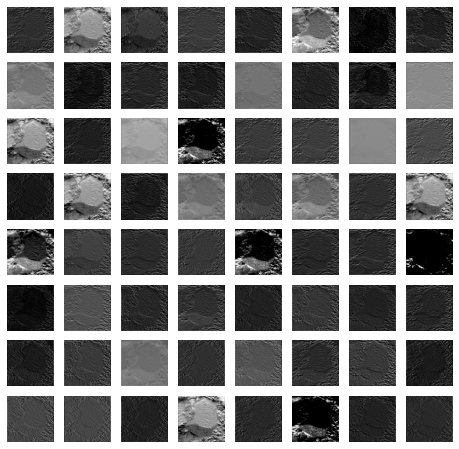

saving images in layer_2 ...


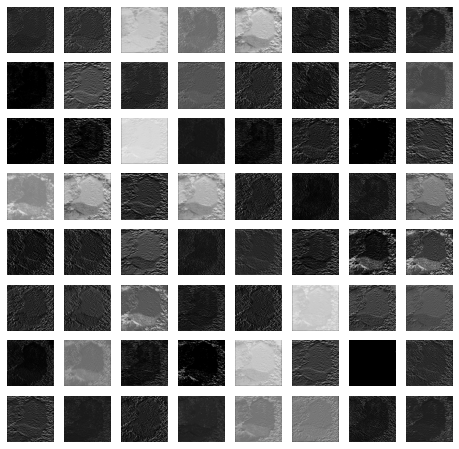

saving images in layer_3 ...


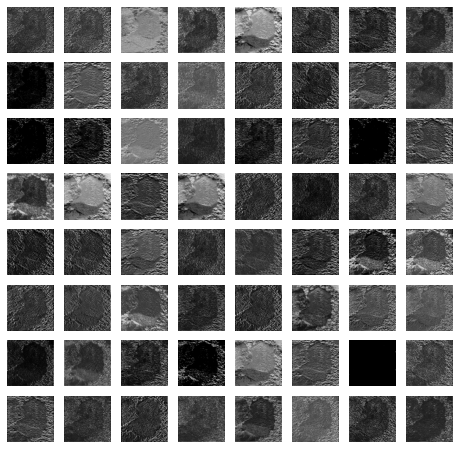

saving images in layer_4 ...


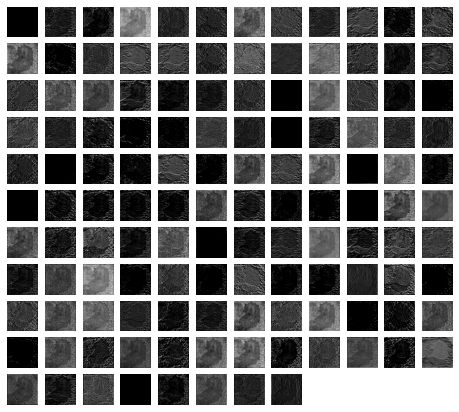

saving images in layer_5 ...


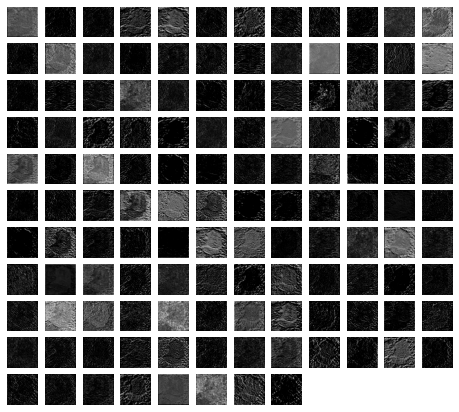

saving images in layer_6 ...


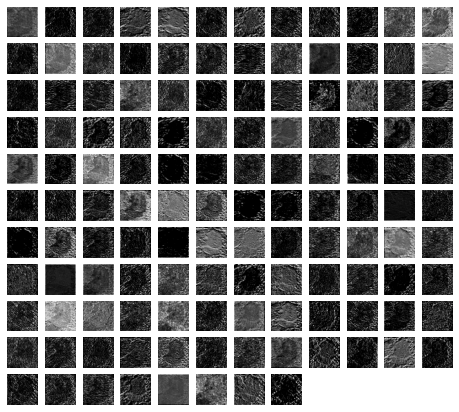

saving images in layer_7 ...


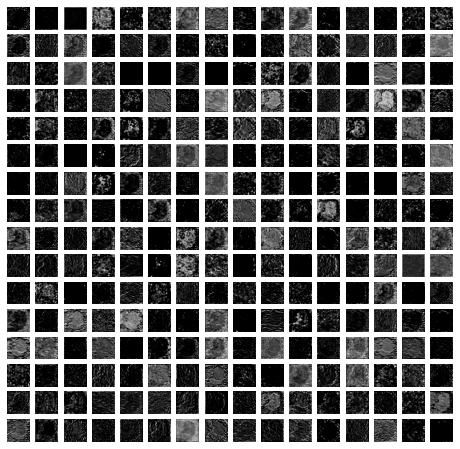

saving images in layer_8 ...


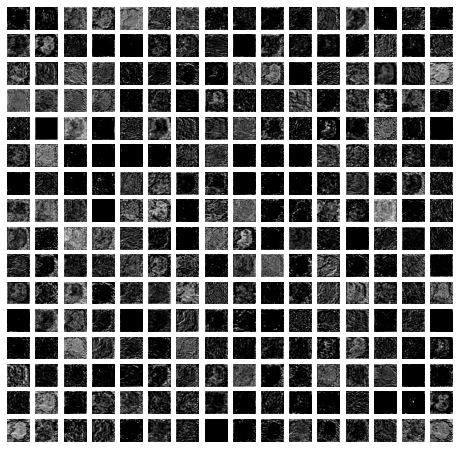

saving images in layer_9 ...


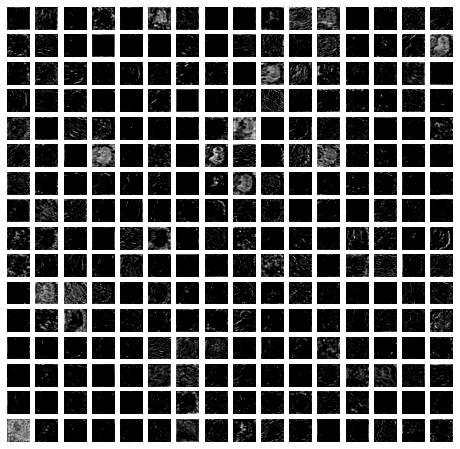

saving images in layer_10 ...


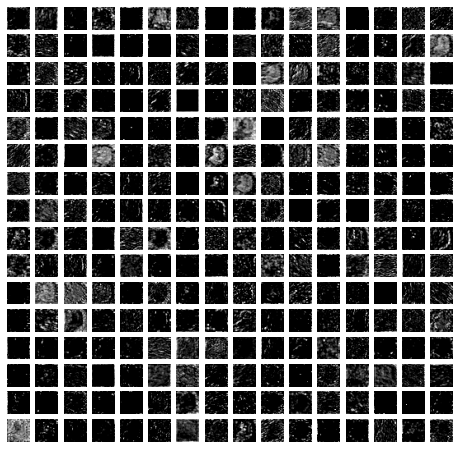

saving images in layer_11 ...


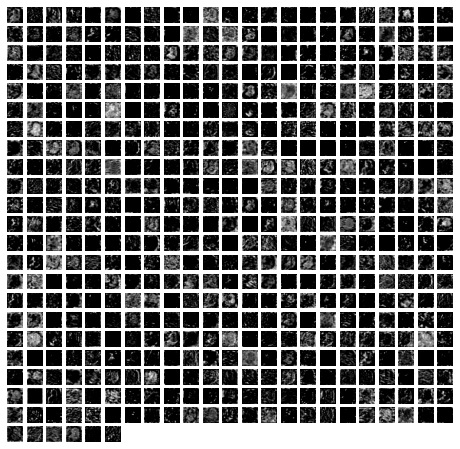

saving images in layer_12 ...


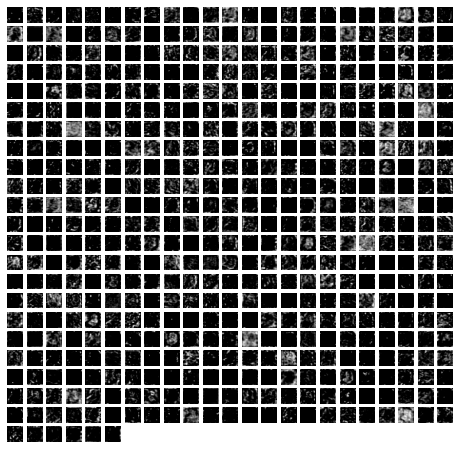

saving images in layer_13 ...


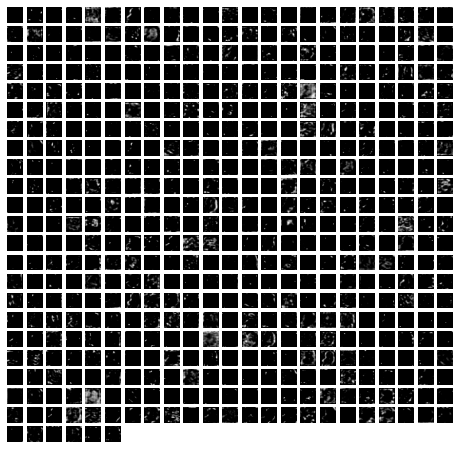

saving images in layer_14 ...


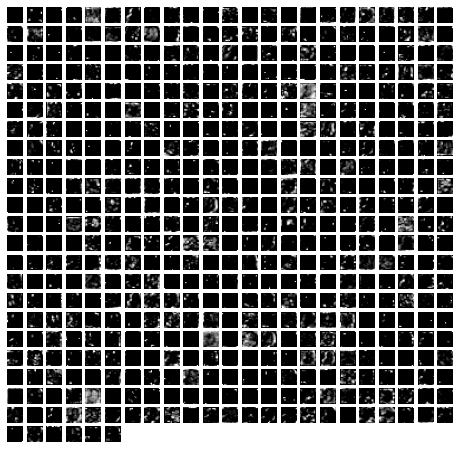

saving images in layer_15 ...


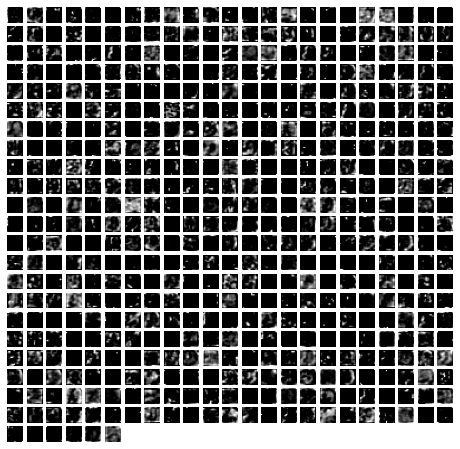

saving images in layer_16 ...


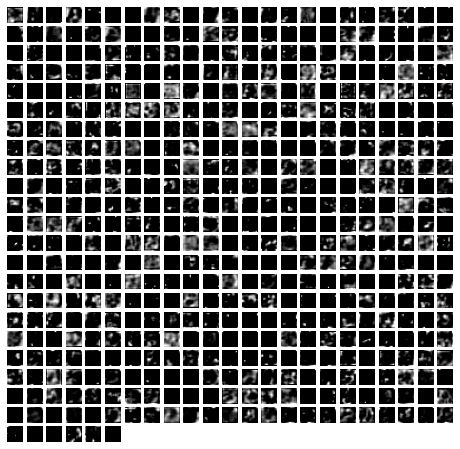

saving images in layer_17 ...


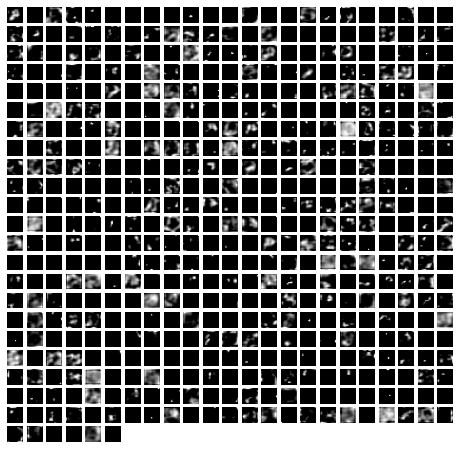

saving images in layer_18 ...


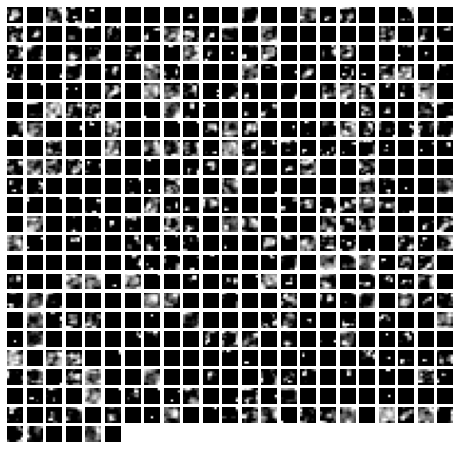

All layer images saved!


In [45]:
for i in range(19): 
  visual(model, X_test[0], i)
print("All layer images saved!")